In [280]:
import numpy as np
from sklearn import preprocessing, neighbors, svm
from sklearn.model_selection import cross_validate, train_test_split
import pandas as pd
from scipy.io import loadmat, savemat
import time
%matplotlib inline
import matplotlib.pyplot as plt

In [281]:
# Load the dataset file
ThreeClassTrainingData = loadmat('ThreeClassTrainingData.mat')
ThreeClassTestData = loadmat('ThreeClassTestData.mat')

# Training and Test Dataset
X_train = ThreeClassTrainingData['X_train']
y_train = ThreeClassTrainingData['y_train']

X_test = ThreeClassTestData['X_test']
y_test = ThreeClassTestData['y_test']


# Prepare the training data set for One-against-All #

In [ ]:

# Split the data set into training as three sets of classes : (1&(2,3), 2&(1,3) and 3&(1,2))
X_train1 = np.vstack((X_train[:240,:], X_train[240:480,:], X_train[480:,:]))
X_train2 = np.vstack((X_train[240:480,:], X_train[:240,:], X_train[480:,:]))
X_train3 = np.vstack((X_train[480:,:], X_train[:240,:], X_train[240:480,:]))

y_train_mod = np.vstack((np.full((240,1), -1), np.ones((480,1))))


# Prepare the training data set for One-against-One #

In [ ]:
## For One-against-One ##

# Split the data set into training as th three sets of classes : (1&2, 2&3 and 1&3)
X_train12 = np.vstack((X_train[:240,:], X_train[240:480,:]))
X_train23 = np.vstack((X_train[240:480,:], X_train[480:,:]))
X_train13 = np.vstack((X_train[:240,:], X_train[480:,:]))

y_train12 = np.sign(np.vstack((y_train[:240,:], y_train[240:480,:])) - 1.5*np.ones((480,1)))
y_train23 = np.sign(np.vstack((y_train[240:480,:], y_train[480:,:])) - 2.5*np.ones((480,1)))
y_train13 = np.sign(np.vstack((y_train[:240,:], y_train[480:,:])) - 2*np.ones((480,1)))

# Plot of the training data #

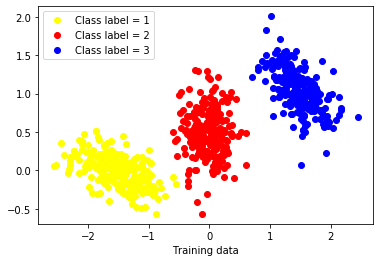

In [286]:

plt.plot(X_train[:240,0], X_train[:240,1], 'o', label='Class label = 1', color='yellow')
plt.plot(X_train[240:480,0], X_train[240:480,1], 'o', label='Class label = 2', color='red')
plt.plot(X_train[480:,0], X_train[480:,1], 'o', label='Class label = 3', color='blue')
plt.xlabel("Training data")
plt.legend(numpoints=1)

# Create and train the SVM models for One-against-All method #

In [282]:

start_train_time_ova = time.time()

# For Class 1 and (2,3)
svm1 = svm.SVC(kernel='linear')
svm1.fit(X_train1, y_train_mod)

# For Class 2 and (1,3)
svm2 = svm.SVC(kernel='linear')
svm2.fit(X_train2, y_train_mod)

# For Class 3 and (1,2)
svm3 = svm.SVC(kernel='linear')
svm3.fit(X_train3, y_train_mod)

end_train_time_ova = time.time()

total_train_time_ova = end_train_time_ova - start_train_time_ova

/Users/sidharthgurbani/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/sidharthgurbani/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/sidharthgurbani/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Create and train the SVM models for One-against-One method #

In [283]:

start_train_time_ovo = time.time()

# For Class 1 and 2
svm4 = svm.SVC(kernel='linear')
svm4.fit(X_train12, y_train12)

# For Class 2 and 3
svm5 = svm.SVC(kernel='linear')
svm5.fit(X_train23, y_train23)

# For Class 1 and 3
svm6 = svm.SVC(kernel='linear')
svm6.fit(X_train13, y_train13)

end_train_time_ovo = time.time()

total_train_time_ovo = end_train_time_ovo - start_train_time_ovo

/Users/sidharthgurbani/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/sidharthgurbani/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/sidharthgurbani/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Test the test data set and compare the predicted outputs with the given test labels and find the error rate #

In [284]:

start_test_time_ova = time.time()
y_test_hat_ova = np.zeros((y_test.shape))

for i in range(y_test_hat_ova.shape[0]):
    
    # Predicition for 1 and (2,3)
    y_test_hat_1 = svm1.predict(X_test[i:i+1])
    
    # Predicition for 2 and (1,3)
    y_test_hat_2 = svm2.predict(X_test[i:i+1])
    
    # Predicition for 3 and (1,2)
    y_test_hat_3 = svm3.predict(X_test[i:i+1])
    
    if (y_test_hat_1 == -1) and (y_test_hat_2 == 1) and (y_test_hat_3 == 1):
        y_test_hat_ova[i,0] = 1
    elif (y_test_hat_1 == 1) and (y_test_hat_2 == -1) and (y_test_hat_3 == 1):
        y_test_hat_ova[i,0] = 2
    elif (y_test_hat_1 == 1) and (y_test_hat_2 == 1 and (y_test_hat_3 == -1)):
        y_test_hat_ova[i,0] = 3


end_test_time_ova = time.time()

total_test_time_ova = end_test_time_ova - start_test_time_ova
        
error_vec_ova = [0 if i[0]==i[1] else 1 for i in np.hstack((y_test_hat_ova, y_test))]

error_rate_ova = sum(error_vec_ova)/y_test_hat_ova.shape[0]

print("Number of errors are: " + str(sum(error_vec_ova)) + " and error_rate is: " + str(error_rate_ova))
print("Total time for training for One-against-All is: " + str(total_train_time_ova))
print("Total time for testing for One-against-All is: " + str(total_test_time_ova))

Number of errors are: 61 and error_rate is: 0.3388888888888889
Total time for training for One-against-All is: 0.024557113647460938
Total time for testing for One-against-All is: 0.046350955963134766


# Test the test data set and compare the predicted outputs with the given test labels and find the error rate #

In [285]:

start_test_time_ovo = time.time()

y_test_hat_ovo = np.zeros((y_test.shape))

for i in range(y_test_hat_ovo.shape[0]):
    
    # Predicition for 1 and 2
    y_test_hat_1 = svm4.predict(X_test[i:i+1])
    
    # Predicition for 2 and 3
    y_test_hat_2 = svm5.predict(X_test[i:i+1])
    
    # Predicition for 1 and 3
    y_test_hat_3 = svm6.predict(X_test[i:i+1])
    
    if (y_test_hat_1 == -1) and (y_test_hat_3 == -1):
        y_test_hat_ovo[i,0] = 1
    elif (y_test_hat_1 == 1) and (y_test_hat_2 == -1):
        y_test_hat_ovo[i,0] = 2
    elif (y_test_hat_2 == 1) and (y_test_hat_3 == 1):
        y_test_hat_ovo[i,0] = 3

end_test_time_ovo = time.time()

total_test_time_ovo = end_test_time_ovo - start_test_time_ovo

error_vec_ovo = [0 if i[0]==i[1] else 1 for i in np.hstack((y_test_hat_ovo, y_test))]

error_rate_ovo = sum(error_vec_ovo)/y_test_hat_ovo.shape[0]

print("Number of errors are: " + str(sum(error_vec_ovo)) + " and error_rate is: " + str(error_rate_ovo))
print("Total time for training for One-against-One is: " + str(total_train_time_ovo))
print("Total time for testing for One-against-One is: " + str(total_test_time_ovo))

Number of errors are: 1 and error_rate is: 0.005555555555555556
Total time for training for One-against-One is: 0.004694700241088867
Total time for testing for One-against-One is: 0.04564619064331055
